# k-means clustering

## Iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [2]:
np.random.seed(82)
data = load_iris()
print(dir(data))
print(data.data.shape, data.target.shape)
print(type(data.data), type(data.target))
X = data.data
Y = data.target

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4) (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Visualize with t-SNE

reducing dimensionality

In [3]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)
print(X_embedded.shape)

(150, 2)


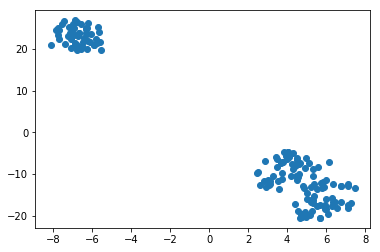

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(
    X_embedded[:,0],
    X_embedded[:,1]
)
plt.show()

### Ground truth classes

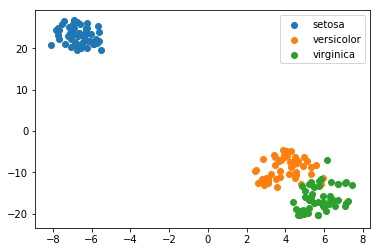

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
K = len(data.target_names)

for k in range(K):
    scatter = ax.scatter(
        X_embedded[np.argwhere(Y==k),0],
        X_embedded[np.argwhere(Y==k),1],
        label=data.target_names[k]
    )
ax.legend(loc='best')
plt.show()

## k-means clustering on $R^2$

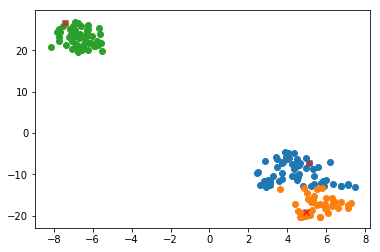

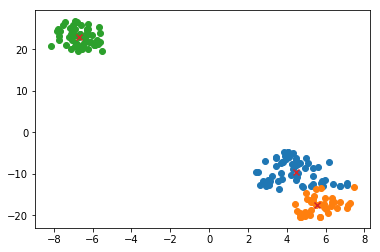

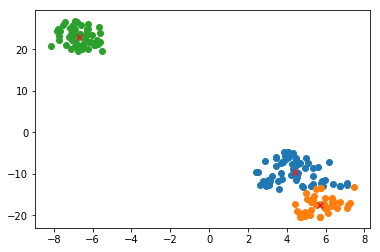

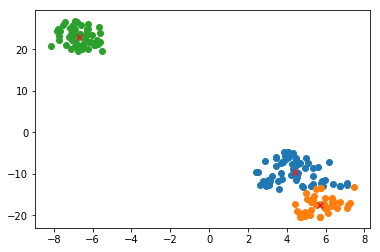

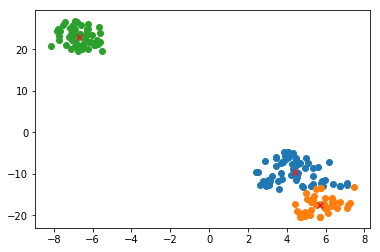

In [6]:
n_iterations = 5

# pick initial centroids and dummy assignments
centroids = X_embedded[np.random.choice(X.shape[0], K)]
assignments = np.empty(X.shape[0])

for i in range(n_iterations):
    # assign points
    for j in range(X.shape[0]):
        min_distance = float('inf')
        
        for k in range(K):
            distance = np.linalg.norm(X_embedded[j]-centroids[k])
            if distance <= min_distance:
                min_distance = distance
                assignments[j] = k
    # draw
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for k in range(K):
        scatter = ax.scatter(
            X_embedded[np.argwhere(assignments==k),0],
            X_embedded[np.argwhere(assignments==k),1]
        )
    scatter = ax.scatter(
        centroids[:,0],
        centroids[:,1],
        marker='x'
    )
        
    plt.show()

    # update centroids
    for k in range(K):
        centroids[k] = np.average(X_embedded[np.argwhere(assignments==k)], axis=0)

## k-means clustering

on the original dimension

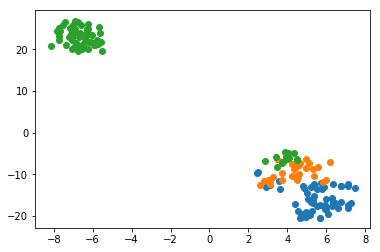

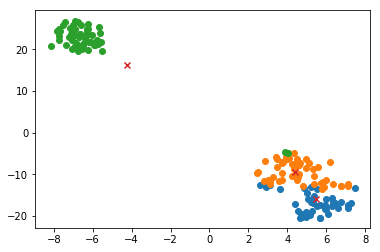

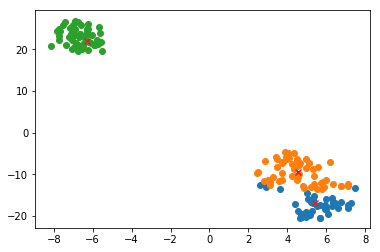

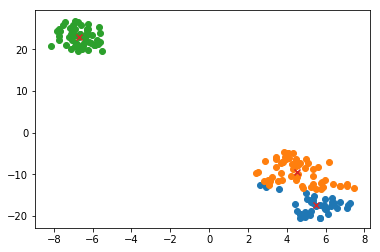

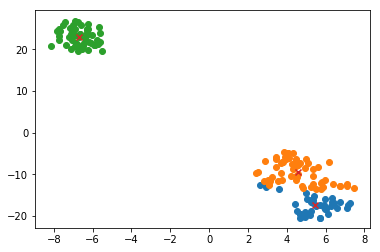

In [7]:
n_iterations = 5

# pick initial centroids and dummy assignments
centroids = X[np.random.choice(X.shape[0], K)]
assignments = np.empty(X.shape[0])

pseudo_centroids = np.empty((K, X_embedded.shape[1]))

for i in range(n_iterations):
    # assign points
    for j in range(X.shape[0]):
        min_distance = float('inf')
        
        for k in range(K):
            distance = np.linalg.norm(X[j]-centroids[k])
            if distance <= min_distance:
                min_distance = distance
                assignments[j] = k
                
    # draw
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for k in range(K):
        scatter = ax.scatter(
            X_embedded[np.argwhere(assignments==k),0],
            X_embedded[np.argwhere(assignments==k),1],
            label=data.target_names[k]
        )
    if i > 0:
        scatter = ax.scatter(
            pseudo_centroids[:,0],
            pseudo_centroids[:,1],
            marker='x'
        )
    plt.show()

    # update centroids
    for k in range(K):
        centroids[k] = np.average(X[np.argwhere(assignments==k)], axis=0)
        pseudo_centroids[k] = np.average(X_embedded[np.argwhere(assignments==k)], axis=0) # 